In [22]:
import numpy as np
import pandas as pd
from scipy.signal import argrelmax
import sys
sys.path.append('/usr/local/Cellar/python/2.7.13/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages')
import tensorflow as tf
import tflearn
import tsne
from sklearn.manifold import TSNE
import math
from scipy import cluster
import matplotlib.pyplot as plt
from sklearn.decomposition import ProjectedGradientNMF
%matplotlib inline

np.random.seed(0)
tf.set_random_seed(0)
from sklearn.metrics import classification_report


In [2]:
#Read the CSV file and put it into pandas data frame
df = pd.read_csv('Polymers Plus Analytes_SNV_Reduced_SGSmoothed.csv', index_col=0)

In [3]:
#Take a quick look at the data
df

,200.1318,201.617,203.1022,204.5874,206.0726,207.5577,209.0429,210.5281,212.0133,213.4985,...,1986.816,1988.301,1989.786,1991.272,1992.757,1994.242,1995.727,1997.212,1998.698,2000.183
A1_C1,1.708752,1.775725,1.861025,1.941629,2.011954,2.046811,2.079291,2.112890,2.114177,2.114298,...,-0.665880,-0.656008,-0.649654,-0.641902,-0.642924,-0.636885,-0.630660,-0.626576,-0.600225,-0.613804
A1_C2,2.004295,2.006743,2.108492,2.173715,2.235133,2.287523,2.328738,2.376845,2.390796,2.400700,...,-0.708420,-0.705648,-0.697500,-0.696426,-0.689204,-0.689529,-0.689332,-0.694238,-0.690780,-0.703149
A1_C3,1.641548,1.719635,1.727123,1.780289,1.824746,1.873068,1.920712,1.953743,1.972046,1.972984,...,-0.440724,-0.441731,-0.436140,-0.433233,-0.429963,-0.419810,-0.415419,-0.413493,-0.422153,-0.422688
A1_Gly1,1.659481,1.716239,1.784938,1.847613,1.904956,1.948734,1.974711,2.006418,2.017988,2.022764,...,-0.786990,-0.788303,-0.793475,-0.792389,-0.792823,-0.793748,-0.801304,-0.803293,-0.822496,-0.826604
A1_Gly2,1.167688,1.225181,1.272517,1.320838,1.362455,1.399500,1.423343,1.449302,1.459464,1.450147,...,-1.018188,-1.009754,-1.005993,-1.001317,-1.002929,-1.002543,-1.013830,-1.013618,-1.043767,-1.012335
A1_Gly3,1.667580,1.727449,1.798728,1.832720,1.872614,1.895185,1.913762,1.931283,1.953513,1.951084,...,-1.052663,-1.058615,-1.056988,-1.057154,-1.060322,-1.060348,-1.056159,-1.058370,-1.055079,-1.065565
A1_HC1,1.213005,1.246412,1.294557,1.350900,1.414119,1.480618,1.557076,1.647480,1.727396,1.797848,...,-0.651136,-0.651901,-0.649899,-0.651513,-0.654322,-0.656268,-0.657652,-0.659916,-0.659924,-0.662043
A1_HC2,1.214321,1.250366,1.306477,1.366602,1.439891,1.518616,1.600351,1.688306,1.767251,1.833345,...,-0.669614,-0.669527,-0.670756,-0.671608,-0.673269,-0.674685,-0.675474,-0.675245,-0.672897,-0.681195
A1_HC3,1.144966,1.175299,1.241173,1.298419,1.366901,1.440046,1.517917,1.606259,1.688764,1.761680,...,-0.708548,-0.709161,-0.707377,-0.707572,-0.709099,-0.710288,-0.714087,-0.714551,-0.722282,-0.711487
A1_Ile1,2.080212,2.152591,2.180875,2.231400,2.285243,2.349542,2.394868,2.431752,2.461441,2.454932,...,-0.606310,-0.601787,-0.596811,-0.591758,-0.591364,-0.595460,-0.595208,-0.585713,-0.576605,-0.549335


In [4]:
# How many points on each side to use for the comparison to consider comparator(n, n+x) to be True.
neighborhood = 5
for neighborhood in range(1,10):
    local_maxima = []
    for i in range(df.shape[0]):
        row = np.array(df.iloc[[i]])
        a = argrelmax(row[0], order = neighborhood)
        local_maxima.append(len(a[0]))
    print("The average of local maxima with neighborsize of: %d is %.3f"%(neighborhood,np.mean(local_maxima)))

The average of local maxima with neighborsize of: 1 is 106.826
The average of local maxima with neighborsize of: 2 is 64.559
The average of local maxima with neighborsize of: 3 is 50.033
The average of local maxima with neighborsize of: 4 is 44.026
The average of local maxima with neighborsize of: 5 is 40.259
The average of local maxima with neighborsize of: 6 is 35.244
The average of local maxima with neighborsize of: 7 is 31.648
The average of local maxima with neighborsize of: 8 is 29.152
The average of local maxima with neighborsize of: 9 is 27.030


In [5]:
def xavier_init(fan_in, fan_out, constant=1): 
    """ Xavier initialization of network weights"""
    # https://stackoverflow.com/questions/33640581/how-to-do-xavier-initialization-on-tensorflow
    low = -constant*np.sqrt(6.0/(fan_in + fan_out)) 
    high = constant*np.sqrt(6.0/(fan_in + fan_out))
    return tf.random_uniform((fan_in, fan_out), 
                             minval=low, maxval=high, 
                             dtype=tf.float32)

In [6]:
data_set = []
for i in range(df.shape[0]):
    row = np.array(df.iloc[[i]])
    data_set.append(row[0])

In [7]:
#Number of neurons in each layer
layer1_neurons = int(math.pow(2,10))
layer2_neurons = int(math.pow(2,8))
layer3_neurons = int(math.pow(2,4))
layer4_neurons = int(math.pow(2,1))

print("Layer1: %d, Layer2: %d, Layer3: %d, Layer4: %d"%(layer1_neurons,layer2_neurons,layer3_neurons,layer4_neurons))

Layer1: 1024, Layer2: 256, Layer3: 16, Layer4: 2


In [ ]:
#Initializing the DNN
tflearn.init_graph(num_cores=8, gpu_memory_fraction=0.8)
# Building the encoder
encoder = tflearn.input_data(shape=[None, len(data_set[0])])
INPUT = encoder
encoder = tflearn.fully_connected(encoder, layer1_neurons, name = "en_1")
encoder = tflearn.fully_connected(encoder, layer2_neurons, name = "en_2")
encoder = tflearn.fully_connected(encoder, layer3_neurons, name = "en_3")
encoder = tflearn.fully_connected(encoder, layer4_neurons, name = "en_4")
HIDDEN_STATE = encoder
# Building the decoder
decoder = tflearn.fully_connected(encoder, layer3_neurons, name = "de_1")
decoder = tflearn.fully_connected(encoder, layer2_neurons, name = "de_2")
decoder = tflearn.fully_connected(decoder, layer1_neurons, name = "de_3")
decoder = tflearn.fully_connected(decoder, len(data_set[0]), name = "de_4")
OUTPUT = decoder    


# Regression, with mean square error
net = tflearn.regression(decoder, optimizer='AdaDelta', learning_rate=0.001,loss='mean_square', metric=None)

# Training the auto encoder
model = tflearn.DNN(net, tensorboard_verbose=0)
model.fit(data_set, data_set, n_epoch=10,validation_set=0.1, run_id="auto_encoder", batch_size=10)

#Encode an input X and return the middle layer of the AE
def encode (X):    
    if len (X.shape) < 2:
        X = X.reshape (1, -1)

    tflearn.is_training(False, model.session)
    res = model.session.run (HIDDEN_STATE, feed_dict={INPUT.name:X})    
    return res    

encode_decode = model.predict(data_set)
result_autoencoder = []
for i in range(len(encode_decode)):
    result_autoencoder.append(encode(i))

In [ ]:
# network parameters
input_dim = len(data_set[0]) # height data input
encoder_hidden_dim = 128
decoder_hidden_dim = 128
latent_dim = 2
batch_size = 10
n_epoch = 10

# paths
TENSORBOARD_DIR='experiment/'
CHECKPOINT_PATH='out_models/'

# encoder
def encode(input_x):
    encoder = tflearn.fully_connected(input_x, encoder_hidden_dim, activation='relu')
    mu_encoder = tflearn.fully_connected(encoder, latent_dim, activation='linear')
    logvar_encoder = tflearn.fully_connected(encoder, latent_dim, activation='linear')
    return mu_encoder, logvar_encoder

# decoder
def decode(z):
    decoder = tflearn.fully_connected(z, decoder_hidden_dim, activation='relu', restore=False)
    x_hat = tflearn.fully_connected(decoder, input_dim, activation='linear', restore=False)
    return x_hat

# sampler
def sample(mu, logvar):
    epsilon = tf.random_normal(tf.shape(logvar), dtype=tf.float32, name='epsilon')
    std_encoder = tf.exp(tf.multiply(0.5, logvar))
    z = tf.add(mu, tf.multiply(std_encoder, epsilon))
    return z

# loss function(regularization)
def calculate_regularization_loss(mu, logvar):
    kl_divergence = -0.5 * tf.reduce_sum(1 + logvar - tf.square(mu) - tf.exp(logvar), reduction_indices=1)
    return kl_divergence

# loss function(reconstruction)
def calculate_reconstruction_loss(x_hat, input_x):
    mse = tflearn.objectives.mean_square(x_hat, input_x)
    return mse

# trainer
def define_trainer(target, optimizer):
    trainop = tflearn.TrainOp(loss=target,
                              optimizer=optimizer,
                              batch_size=batch_size,
                              metric=None,
                              name='vae_trainer')

    trainer = tflearn.Trainer(train_ops=trainop,
                              tensorboard_dir=TENSORBOARD_DIR,
                              tensorboard_verbose=3,
                              checkpoint_path=CHECKPOINT_PATH,
                              max_checkpoints=1)
    return trainer



def define_evaluator(trainer, mu, logvar):
    evaluator = tflearn.Evaluator([mu, logvar], session=trainer.session)
    return evaluator

input_x = tflearn.input_data(shape=(None, len(data_set[0])), name='input_x')
mu, logvar = encode(input_x)
z = sample(mu, logvar)
x_hat = decode(z)


regularization_loss = calculate_regularization_loss(mu, logvar)
reconstruction_loss = calculate_reconstruction_loss(x_hat, input_x)

target = tf.reduce_mean(tf.add(regularization_loss, reconstruction_loss))

optimizer = tflearn.optimizers.AdaDelta()
optimizer = optimizer.get_tensor()

trainer = define_trainer(target, optimizer)

trainer.fit(feed_dicts={input_x: data_set}, val_feed_dicts={input_x: data_set},
            n_epoch=n_epoch,
            show_metric=False,
            snapshot_epoch=False,
            shuffle_all=True,
            run_id='VAE')

In [8]:
model = TSNE(n_components=2, random_state=0)

In [9]:
output = model.fit_transform(data_set)

In [10]:
col = df[df.columns[0]]

In [11]:
col = df.iloc[:,0]

In [12]:
df.head()

,200.1318,201.617,203.1022,204.5874,206.0726,207.5577,209.0429,210.5281,212.0133,213.4985,...,1986.816,1988.301,1989.786,1991.272,1992.757,1994.242,1995.727,1997.212,1998.698,2000.183
A1_C1,1.708752,1.775725,1.861025,1.941629,2.011954,2.046811,2.079291,2.112890,2.114177,2.114298,...,-0.665880,-0.656008,-0.649654,-0.641902,-0.642924,-0.636885,-0.630660,-0.626576,-0.600225,-0.613804
A1_C2,2.004295,2.006743,2.108492,2.173715,2.235133,2.287523,2.328738,2.376845,2.390796,2.400700,...,-0.708420,-0.705648,-0.697500,-0.696426,-0.689204,-0.689529,-0.689332,-0.694238,-0.690780,-0.703149
A1_C3,1.641548,1.719635,1.727123,1.780289,1.824746,1.873068,1.920712,1.953743,1.972046,1.972984,...,-0.440724,-0.441731,-0.436140,-0.433233,-0.429963,-0.419810,-0.415419,-0.413493,-0.422153,-0.422688
A1_Gly1,1.659481,1.716239,1.784938,1.847613,1.904956,1.948734,1.974711,2.006418,2.017988,2.022764,...,-0.786990,-0.788303,-0.793475,-0.792389,-0.792823,-0.793748,-0.801304,-0.803293,-0.822496,-0.826604
A1_Gly2,1.167688,1.225181,1.272517,1.320838,1.362455,1.399500,1.423343,1.449302,1.459464,1.450147,...,-1.018188,-1.009754,-1.005993,-1.001317,-1.002929,-1.002543,-1.013830,-1.013618,-1.043767,-1.012335


In [13]:
tsne_result = TSNE(n_components=2, perplexity=100, verbose=2).fit_transform(data_set)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 269 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 270 / 270
[t-SNE] Mean sigma: 12.659892
[t-SNE] Iteration 25: error = 0.2273141, gradient norm = 0.0176430
[t-SNE] Iteration 50: error = 0.3000943, gradient norm = 0.0174180
[t-SNE] Iteration 75: error = 0.2897153, gradient norm = 0.0172545
[t-SNE] Iteration 100: error = 0.6682754, gradient norm = 0.0209463
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.668275
[t-SNE] Iteration 125: error = 0.9235449, gradient norm = 0.0275240
[t-SNE] Iteration 150: error = 1.5640441, gradient norm = 0.0432017
[t-SNE] Iteration 175: error = 1.5916212, gradient norm = 0.0246210
[t-SNE] Iteration 175: did not make any progress during the last 30 episodes. Finished.
[t-SNE] Error after 175 iterations: 0.668275


In [14]:
#Get the labels for names
df_1 = pd.read_csv('Polymers Plus Analytes_SNV_Reduced_SGSmoothed.csv')
names = df_1.iloc[:,0]
labels = []
for name in names:
    labels.append(name)

In [15]:
colors = {}
colors['A1'] = 'red'
colors['A2'] = 'blue'
colors['A3'] = 'green'
colors['A4'] = 'orange'
colors['C1'] = 'lawngreen'
colors['C2'] = 'khaki'
colors['C3'] = 'darkviolet'
colors['C4'] = 'indigo'
colors['PC'] = 'cyan'
colors['PE'] = 'teal'
colors['PI'] = 'salmon'
colors['PM'] = 'darkcyan'
colors['PV'] = 'seagreen'
label_color = []
for i in range(df.shape[0]):
    label_color.append(colors[labels[i][:2]])

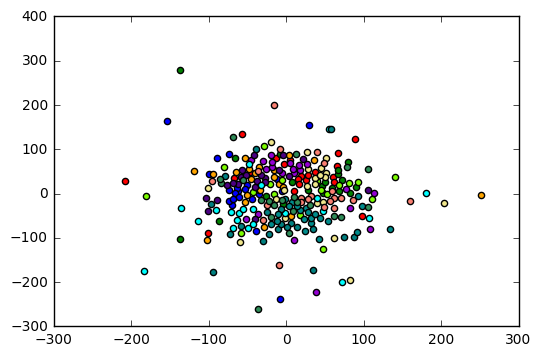

In [16]:
# plot the result
vis_x = tsne_result[:, 0]
vis_y = tsne_result[:, 1]
for i in range(df.shape[0]):
    plt.scatter(vis_x[i], vis_y[i], c = label_color[i])

In [17]:
min_overall = 0
for i in range(df.shape[0]):
    min_overall = min(min(data_set[i]) , min_overall)
min_overall *= -1
data_set_pos = []
for i in range(df.shape[0]):
    data_set_pos.append(data_set[i] + min_overall)

In [18]:
num_component = 5
nmf_model = ProjectedGradientNMF(n_components = num_component, init='random', random_state=0)
W = nmf_model.fit_transform(data_set_pos);
H = nmf_model.components_;

/Library/Python/2.7/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class ProjectedGradientNMF is deprecated; It will be removed in release 0.19. Use NMF instead.'pg' solver is still available until release 0.19.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/decomposition/nmf.py:775: DeprecationWarning: 'pg' solver will be removed in release 0.19. Use 'cd' solver instead.
  " Use 'cd' solver instead.", DeprecationWarning)


In [21]:
clusters = [[] for _ in range(num_component)]
for i in range(len(W)):
    cluster_ = np.argmax(W[i])
    clusters[cluster_].append(labels[i])

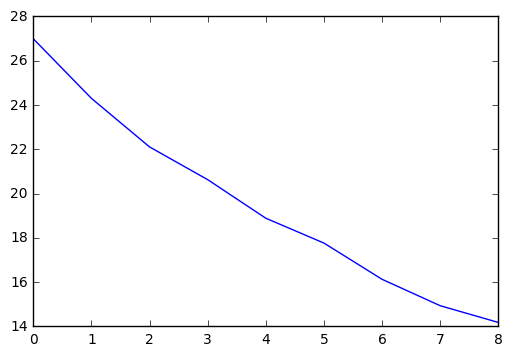

In [23]:
initial = [cluster.vq.kmeans(data_set,i) for i in range(1,10)]
plt.plot([var for (cent,var) in initial])
plt.show()

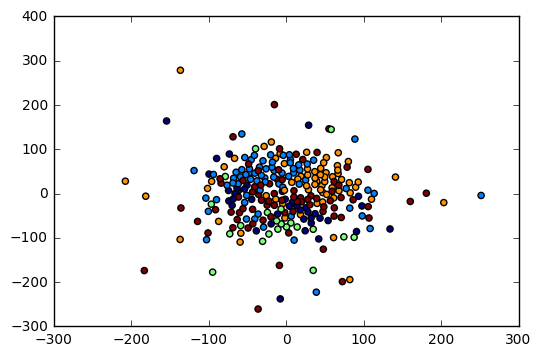

In [24]:
cent, var = initial[4]
#use vq() to get as assignment for each obs.
assignment,cdist = cluster.vq.vq(data_set,cent)
plt.scatter(vis_x, vis_y, c=assignment)
plt.show()
